<a href="https://colab.research.google.com/github/ad709kr/Bike-Sharing-Demand-Prediction/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Member name**    - Adarsh Kumar


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here : https://github.com/ad709kr/Bike-Sharing-Demand-Prediction

# **Problem Statement**
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## Data Description
<br>The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
<br>**Attribute Information**:
<br>Date : year-month-day
<br>Rented Bike count - Count of bikes rented at each hour
<br>Hour - Hour of the day
<br>Temperature-Temperature in Celsius
<br>Humidity - %
<br>Windspeed - m/s
<br>Visibility - 10m
<br>Dew point temperature - Celsius
<br>Solar radiation - MJ/m2
<br>Rainfall - mm
<br>Snowfall - cm
<br>Seasons - Winter, Spring, Summer, Autumn
<br>Holiday - Holiday/No holiday
<br>Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [85]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [87]:
# Load Dataset
path = '/content/drive/MyDrive/Almabetter/Bike_sharing_demand_prediction/Copy of SeoulBikeData.csv'
file = pd.read_csv(path,encoding = 'unicode_escape')

### Dataset First View

In [88]:
# Dataset First Look
file.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [89]:
# Dataset Rows & Columns count
print("Dataset consist ", file.shape[0]," rows and ",file.shape[1],"columns.")

Dataset consist  8760  rows and  14 columns.


### Dataset Information

In [90]:
# Dataset Info
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [91]:
# Dataset Duplicate Value Count
file[file.duplicated()].count()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#### Missing Values/Null Values

In [92]:
# Missing Values/Null Values Count
file.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did you know about your dataset?

There is no duplicate and missing value present in the given dataset.

## ***2. Understanding Your Variables***

In [93]:
# Dataset Columns
file.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [94]:
# Dataset Describe
file.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description 

**Date**- object feature which would be converted to datetime feature
<br>**Hour, Humidity(%),Visibility (10m)** are of int type.
<br>**Temperature(°C),Wind speed (m/s),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)** are of float type.
<br>**Seasons,Holiday,Functioning Day** are of object type. 
<br>**Rented Bike Count**-Target variable of int type

### Check Unique Values for each variable.

In [95]:
# Check Unique Values for each variable.
print(file['Hour'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [96]:
print(file['Humidity(%)'].unique()) # Although these are finite set but can have ordinal nature so we will treat it as numerical feature

[37 38 39 40 36 35 27 24 21 23 25 26 54 58 66 77 79 81 83 84 87 86 82 68
 57 49 41 48 51 53 52 55 56 69 71 73 75 91 92 89 85 76 90 88 47 30 29 32
 43 45 44 42 34 33 31 28 46 59 78 70 64 60 94 93 96 65 50 74 63 61 72 62
 22 67 80 95 15 20 17 18 16 19 14 97 98 10 13 12 11  0]


In [97]:
print(file['Seasons'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']


In [98]:
print(file['Holiday'].unique())

['No Holiday' 'Holiday']


In [99]:
print(file['Functioning Day'].unique())

['Yes' 'No']


**Inference:** we have four categorical variable

## 3. ***Data Wrangling***

### Data Wrangling Code

In [100]:
# Write your code to make your dataset analysis ready.
try:
  # Lets convert pickup_datetime and drop_off datetime to datetime functions
  file['Date'] = pd.to_datetime(file['Date'])
  
  # date_time to day
  file['day']=file['Date'].dt.day_name()
  
  # date_time to month
  file['month']=file['Date'].dt.month
except Exception as e:
  print(e)

In [101]:
file.drop(['Date'], axis=1,inplace=True) # since we have extracted the day and month information lets remove the date column

In [102]:
# lets encode hour as morning,afternoon,evening,night
def hour_encoding(hour):
  if hour in range(6,12):
    st = 'morning'
   
  elif hour in range(12,17):
    st = 'afternoon'
  elif hour in range(17,22):
    st = 'evening'
  else:
    st = 'night'
  return st


In [103]:
file['day_time'] = file['Hour'].apply(lambda x :hour_encoding(x))

In [104]:
file.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,day_time
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,night
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,night
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,night
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,night
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,night


In [105]:
print("Holiday")
print(file['Holiday'].value_counts())
print("Functioning Day")
print(file['Functioning Day'].value_counts())

Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
Functioning Day
Yes    8465
No      295
Name: Functioning Day, dtype: int64


In [106]:
# Lets find the total number of bikes on each category for different categorical dataset
# (1) Bike demand on Holiday feature
df = pd.DataFrame(file.groupby(['Holiday']).mean().reset_index())
print(df[['Holiday','Rented Bike Count']])

      Holiday  Rented Bike Count
0     Holiday         499.756944
1  No Holiday         715.228026


In [107]:
# (2) Bike demand vs hours
df = pd.DataFrame(file.groupby(['Hour']).mean().reset_index())
print(df[['Hour','Rented Bike Count']])

    Hour  Rented Bike Count
0      0         541.460274
1      1         426.183562
2      2         301.630137
3      3         203.331507
4      4         132.591781
5      5         139.082192
6      6         287.564384
7      7         606.005479
8      8        1015.701370
9      9         645.983562
10    10         527.821918
11    11         600.852055
12    12         699.441096
13    13         733.246575
14    14         758.824658
15    15         829.186301
16    16         930.621918
17    17        1138.509589
18    18        1502.926027
19    19        1195.147945
20    20        1068.964384
21    21        1031.449315
22    22         922.797260
23    23         671.126027


In [108]:
# (2) Bike demand vs Seasons
df = pd.DataFrame(file.groupby(['Seasons']).mean().reset_index())
print(df[['Seasons','Rented Bike Count']])

  Seasons  Rented Bike Count
0  Autumn         819.597985
1  Spring         730.031250
2  Summer        1034.073370
3  Winter         225.541204


In [109]:
# (2) Bike demand vs Seasons
df = pd.DataFrame(file.groupby(['Functioning Day']).mean().reset_index())
print(df[['Functioning Day','Rented Bike Count']])

  Functioning Day  Rented Bike Count
0              No           0.000000
1             Yes         729.156999


### What all manipulations have you done and insights you found?

**Observation :**
<br> (1) counted the number of holidays and non functioning days: out of 8760 total 432 holidays and 295 non functioning days.
<br> (2) to find the mean demand of bike on different categorical features: 
<br>Answer for (2):
<br> (a) On no holiday the average demand for bike was higher approximately 1.5 times than on holiday.
<br> (b) The peak hours are 5 to 9 pm and maximum demand at 6pm. However, in morning the maximum demand at 8 am.
<br> (c) In Summer, the average demand is maximum and in winter it is minimum and it totally make sense because in winter due to very cold climatic condition most people dont prefer bike.
<br> (d) The average demand on functioning day is 729.1569


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Univariate analysis:**
<br> In this section, we plot each feature individually with  respect to the target variable which is bike demand and see how these features impact the target variable.

In [110]:
file.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day', 'month', 'day_time'],
      dtype='object')

#### Chart - 1 : Rented Bike Sharing vs Hour

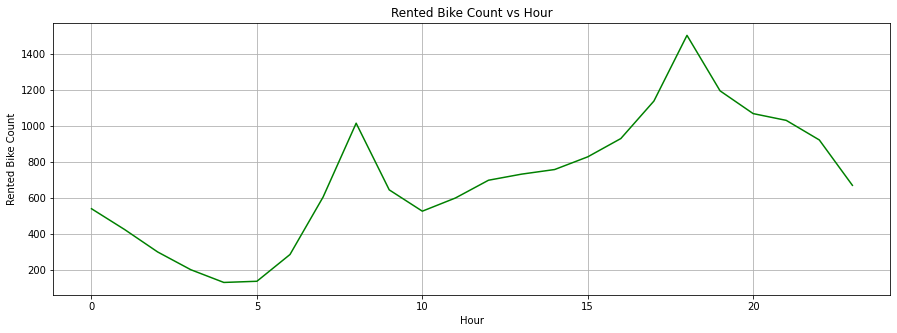

In [111]:
# Chart - 1 visualization code
plt.figure(figsize=(15,5))
df = pd.DataFrame(file.groupby(['Hour']).mean().reset_index())
plt.plot(df['Hour'], df['Rented Bike Count'],'g')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.grid()
plt.title('Rented Bike Count vs Hour')
plt.show()

##### 1. Why did you pick the specific chart?

Since there are 24 categories in hour feature a histogram will be very congested but line graph will be more clean and interpretable. 

##### 2. What is/are the insight(s) found from the chart?

**Observation:**
<br> (1)The peak hours are 5 to 9 pm and maximum demand at 6pm. However, in morning the maximum demand at 8 am.
<br> (2) The demand is significantly low at early morning about 4 am ,5 am. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**
<br> Knowing the average demand of bike at a given time will definitely help to provide availability of bikes.
<br> Based on the above information we can manage our resources efficiently, Like in early morning the demand is very low so we can maintain or repair the bike to make readily available during peak hours.

#### Chart - 2 : Rented Bike Sharing vs Holiday

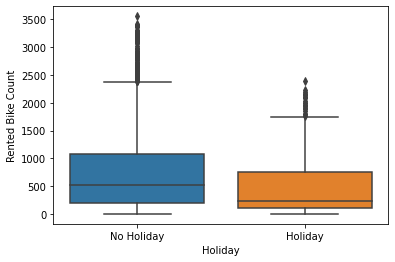

In [112]:
# Chart - 2 visualization code
sns.boxplot(x = file['Holiday'], y=file['Rented Bike Count'])

In [113]:
print(file['Rented Bike Count'][file['Holiday'] == 'Holiday'].describe())
print("-"*50)
print(file['Rented Bike Count'][file['Holiday'] != 'Holiday'].describe())

count     432.000000
mean      499.756944
std       570.772769
min         0.000000
25%       105.750000
50%       240.000000
75%       762.500000
max      2400.000000
Name: Rented Bike Count, dtype: float64
--------------------------------------------------
count    8328.000000
mean      715.228026
std       646.879124
min         0.000000
25%       200.000000
50%       524.500000
75%      1073.000000
max      3556.000000
Name: Rented Bike Count, dtype: float64


##### 1. Why did you pick the specific chart?

choose box plot :Because it will give all the statistical details along with it.

##### 2. What is/are the insight(s) found from the chart?

**observation** 
<br> The median demand on no holiday is more than the twice than on the holiday and the maximum demand on no holiday is also 1.5 times the holiday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer :**
<br> Yes, it can impact positively if we keep more bikes on no holidays and plan servicing and repair work during the holidays.

#### Chart - 3 : Rented Bike Sharing vs Seasons

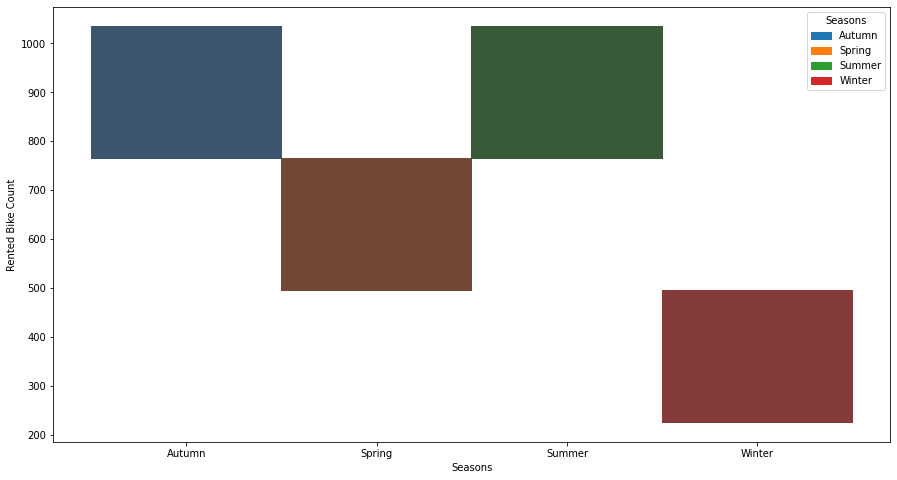

In [114]:
# Chart - 3 visualization code
plt.figure(figsize=(15,8))
df = pd.DataFrame(file.groupby(['Seasons']).mean().reset_index())
sns.histplot(x=df['Seasons'], y=df['Rented Bike Count'],hue = df['Seasons'])

In [115]:
print(df[['Seasons','Rented Bike Count']])

  Seasons  Rented Bike Count
0  Autumn         819.597985
1  Spring         730.031250
2  Summer        1034.073370
3  Winter         225.541204


##### 1. Why did you pick the specific chart?

**Answer :** Season feature has very few category and using histogram will more preferable.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**  In Summer, the average demand is maximum and in winter it is minimum and it totally make sense because in winter due to very cold climatic condition most people dont prefer bike. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer :** In summer the demand is very high so we need to focus more on the availability of bike. However in winter the demand significantly drops which will impact the business negatively.

#### Chart - 4 : mean bike demand vs day

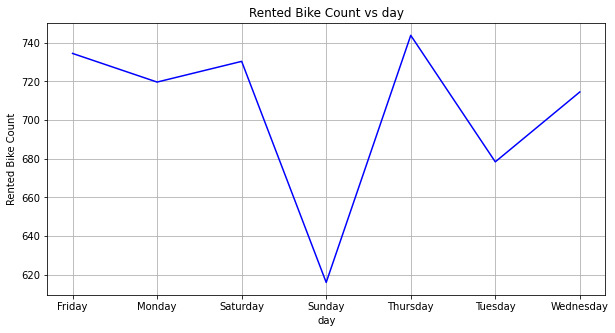

In [116]:
# Chart - 4 visualization code

plt.figure(figsize=(10,5))
df = pd.DataFrame(file.groupby(['day']).mean().reset_index())
plt.plot(df['day'], df['Rented Bike Count'],'b')
plt.xlabel('day')
plt.ylabel('Rented Bike Count')
plt.grid()
plt.title('Rented Bike Count vs day')
plt.show()

##### 1. Why did you pick the specific chart?

**Answer :** It shows a clear variation of the mean demand with respect to days.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here** The average demand is very low on sunday and maximum on thursday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**  on Thursdays, the demand is maximum which is good for business but sunday the demand is very low which could effect our business negatively.

#### Chart - 5 : mean bike demand vs month

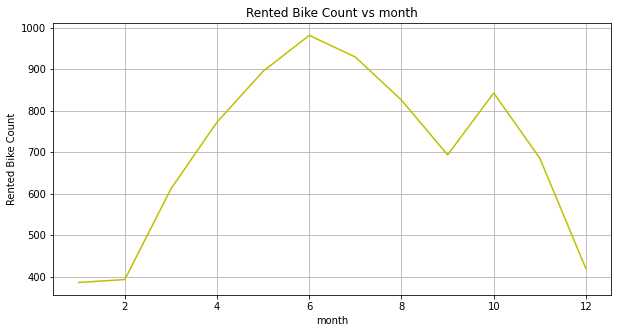

In [117]:
plt.figure(figsize=(10,5))
df = pd.DataFrame(file.groupby(['month']).mean().reset_index())
plt.plot(df['month'], df['Rented Bike Count'],'y')
plt.xlabel('month')
plt.ylabel('Rented Bike Count')
plt.grid()
plt.title('Rented Bike Count vs month')
plt.show()

##### 1. Why did you pick the specific chart?

**Answer Here** For mean demand the line chart will have clear interpretation.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**
<br> In month 6, the average demand is at peak, which might be because in june there is summer season and the temperature range is in 20-30 degree celcius.
<br> the demand is very low in month 12,1,2 and then start increasing, it might be because december,january,february are the winter months and demand is very low in winters but after february the temperature starts rising and due to which the demand is increasing. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**
<br> The peak demand in month 6 which can impact the business positively,but the jan,feb has very low demands which can impact business negatively.

#### Chart - 6 : Rented Bike Sharing vs numerical feature

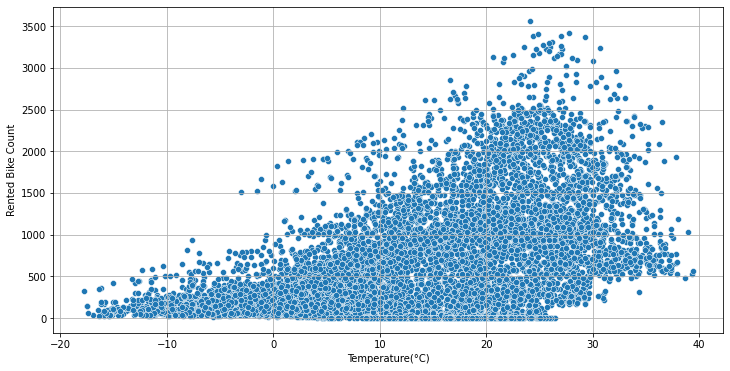

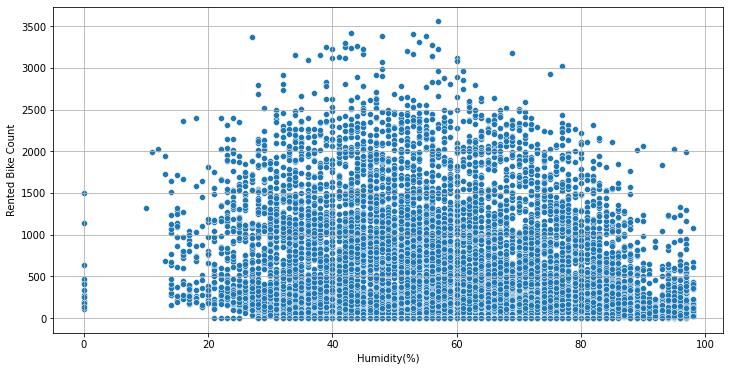

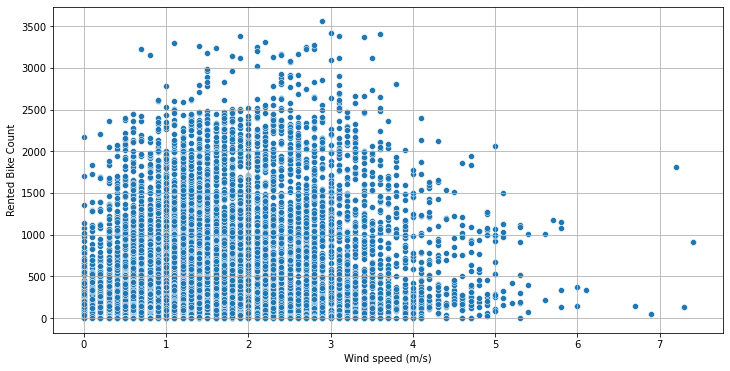

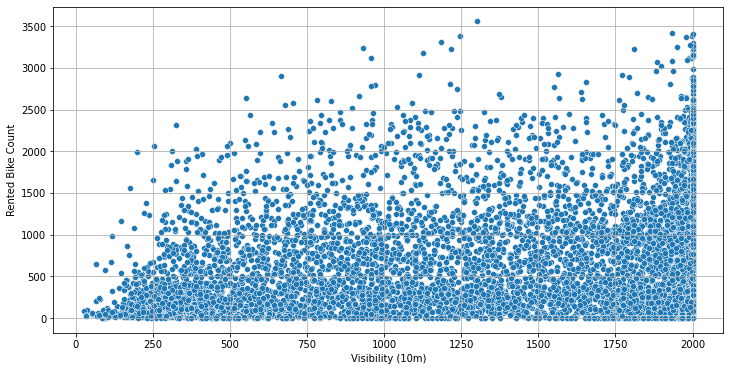

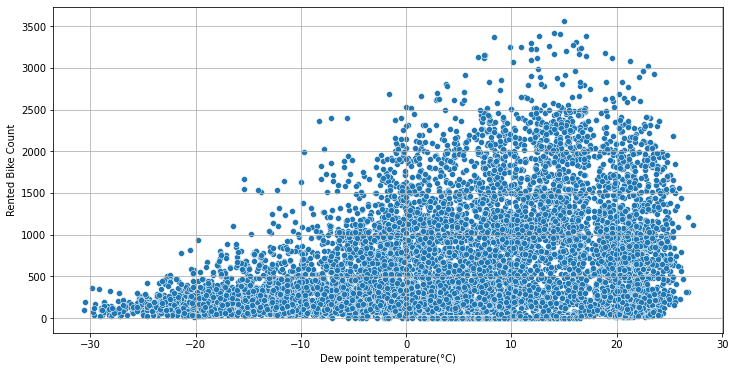

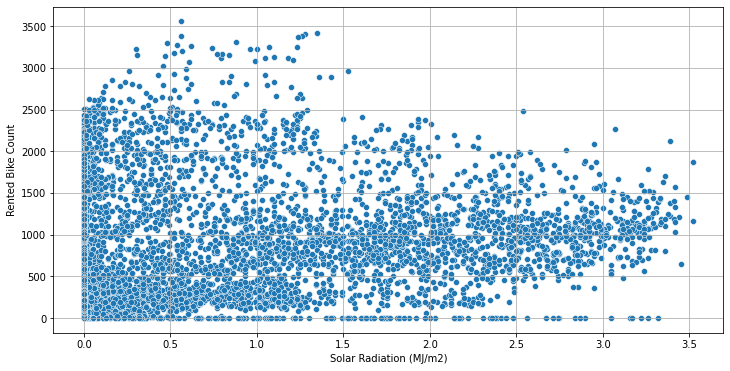

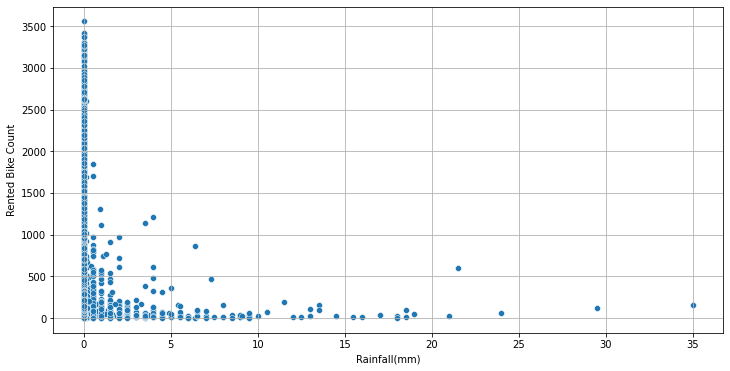

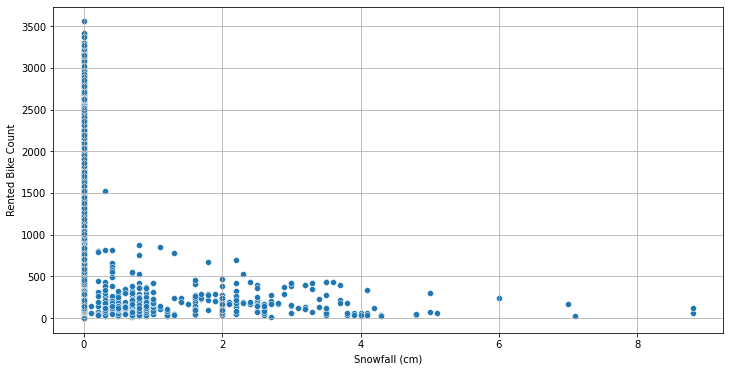

In [118]:
# Chart - 4 visualization code
# 
numerical_feature = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
for feature in numerical_feature:    
  plt.figure(figsize=(12,6))
  sns.scatterplot(file[feature],file['Rented Bike Count'])
  plt.xlabel(feature)
  plt.ylabel('Rented Bike Count')
  plt.grid()
  plt.show()



##### 1. Why did you pick the specific chart?

**Answer**  we choose scatter plot because both the feature are numerical in nature.

##### 2. What is/are the insight(s) found from the chart?

**Answer:** following observation were made from the above plot:
<br> (1)with increase in temperature the demand kept increases up to 30 degree celcius after that there is decrease in demand observed.
<br> (2) Demands are hgh during low solar radiation and it decreases with increase in solar radiation
<br> (3) The maximum demand occurs when there is no rainfall or snowfall, However demand drops significantly if there is any rainfall or snowfall.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**
<br> (1) The temperature range between 10 to 30 , low solar radiation, no rainfall and snowfall days are ver good for business which will impact the business positively. 
<br> (2) lower temperature, high radiation, snowfall or rainfall could impact our business negatively as from the graph it can be observed that these days the demand is low.

#### Chart - 7

In [119]:
def scatterplot_hue(df,col1,col2,target='Rented Bike Count'):
  plt.figure(figsize=(10,5))
  sns.scatterplot(x = df[col1],y = df[target], hue = df[col2])
  plt.xlabel(col1)
  plt.ylabel(target)
  plt.legend()
  plt.grid()
  plt.show()

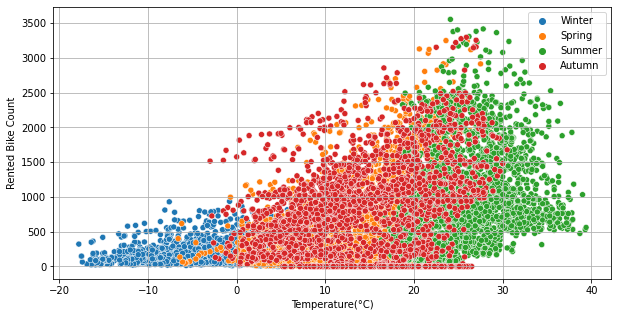

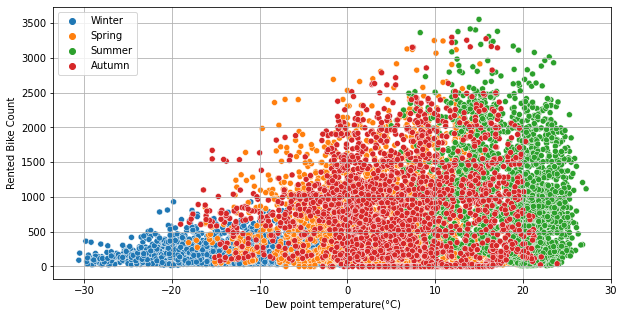

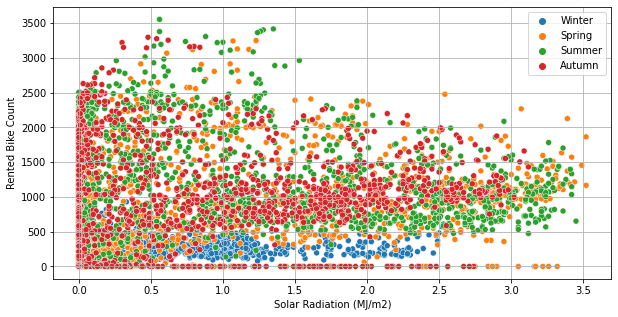

In [120]:
# Chart - 7 visualization code
scatterplot_hue(file,'Temperature(°C)','Seasons')
scatterplot_hue(file,'Dew point temperature(°C)','Seasons')
scatterplot_hue(file,'Solar Radiation (MJ/m2)','Seasons')

##### 1. Why did you pick the specific chart?

**Answer:** The scatterplot with hue as season gives insight about temperature range in different season along with the demand and the temperature and dew point temperature naure similar from the above plot so we keep these features in one plot.

##### 2. What is/are the insight(s) found from the chart?

**Answer:** 
<br> (1) During winter temperature is very low, and so as demand.
<br> (2) Demand is high during spring,summer, automn season.
<br> (3) similar obsevation as temperature can be seen as dew point temperature.
<br> (4) No specific relation is observed from solar radiation and seasons but the demand is high during the low radiation and slightly  low during high radiation.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answe:** Summer, spring and automn seasons with low radiation are the time when demands are high which will create the positive impact on the business.
<br> During winter and when radiation is high the demand is very low.

#### Chart - 8

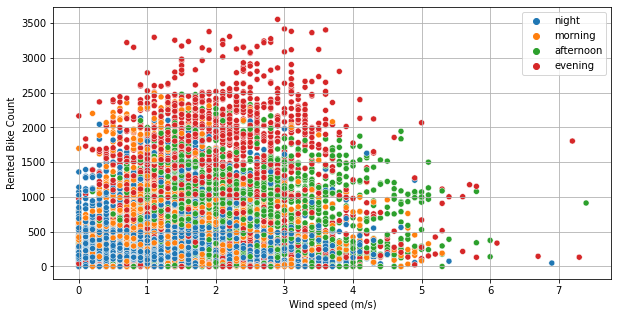

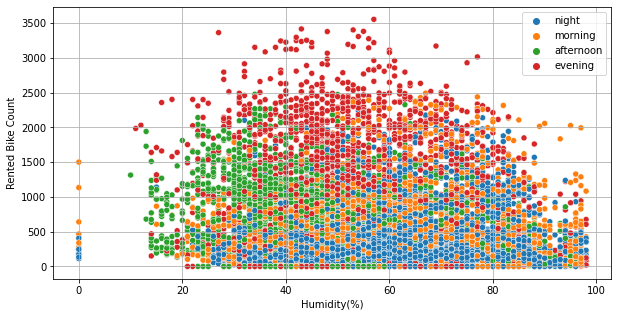

In [121]:

scatterplot_hue(file,'Wind speed (m/s)','day_time')
scatterplot_hue(file,'Humidity(%)','day_time')

##### 1. Why did you pick the specific chart?

**Answer:** gives better visualization for two numerical feature hued on the categorical feature. Here the plots are rented bike count vs wind speed and humidity hued on the day_time.

##### 2. What is/are the insight(s) found from the chart?

**Answer:** Demands were high at evening , the favourable conditions are when the wind speed and humidity are in of 1 to 4 m/s and 30 to 70%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**
<br> At moderate wind speed and humidity the demands are high so favourable conditions for business. However, when wind speed are very low the demands reduces significantly.

#### Chart - 9

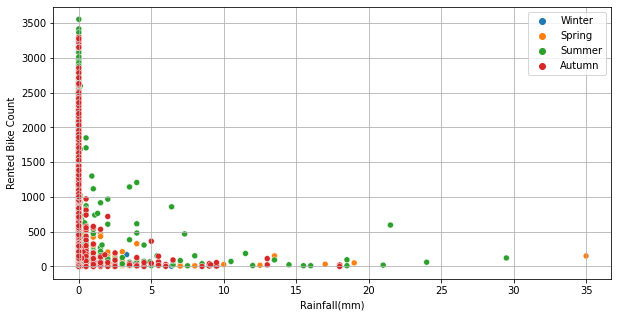

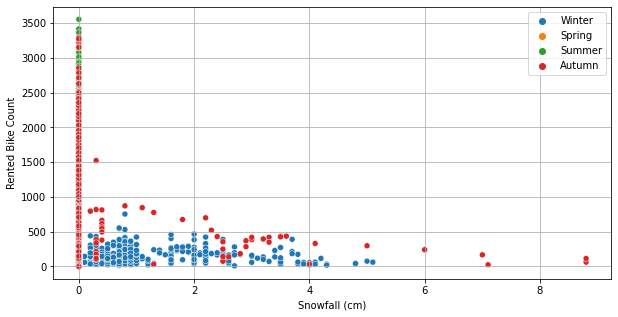

In [122]:
# Chart - 9 visualization code

scatterplot_hue(file,'Rainfall(mm)','Seasons')
scatterplot_hue(file,'Snowfall (cm)','Seasons')

##### 1. Why did you pick the specific chart?

**Answer** Rainfall and snowfall are similar in nature and both depend on season, so we plot both with respect to demand and hued on season.

##### 2. What is/are the insight(s) found from the chart?

**Answer:** 
<br>(1)demands are high when rainfall and snowfall both zero.
<br>(2)most of snowfall takes place in winter season however some snowfall happened in Automn season also.
<br>(3) In summer also there was rainfall of high depth was also observed, which have negative impact on the business.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:** The demand is significantly impacted by the rainfall and snowfall. if it happens it is not good for business.

#### Chart - 10 - Correlation Heatmap

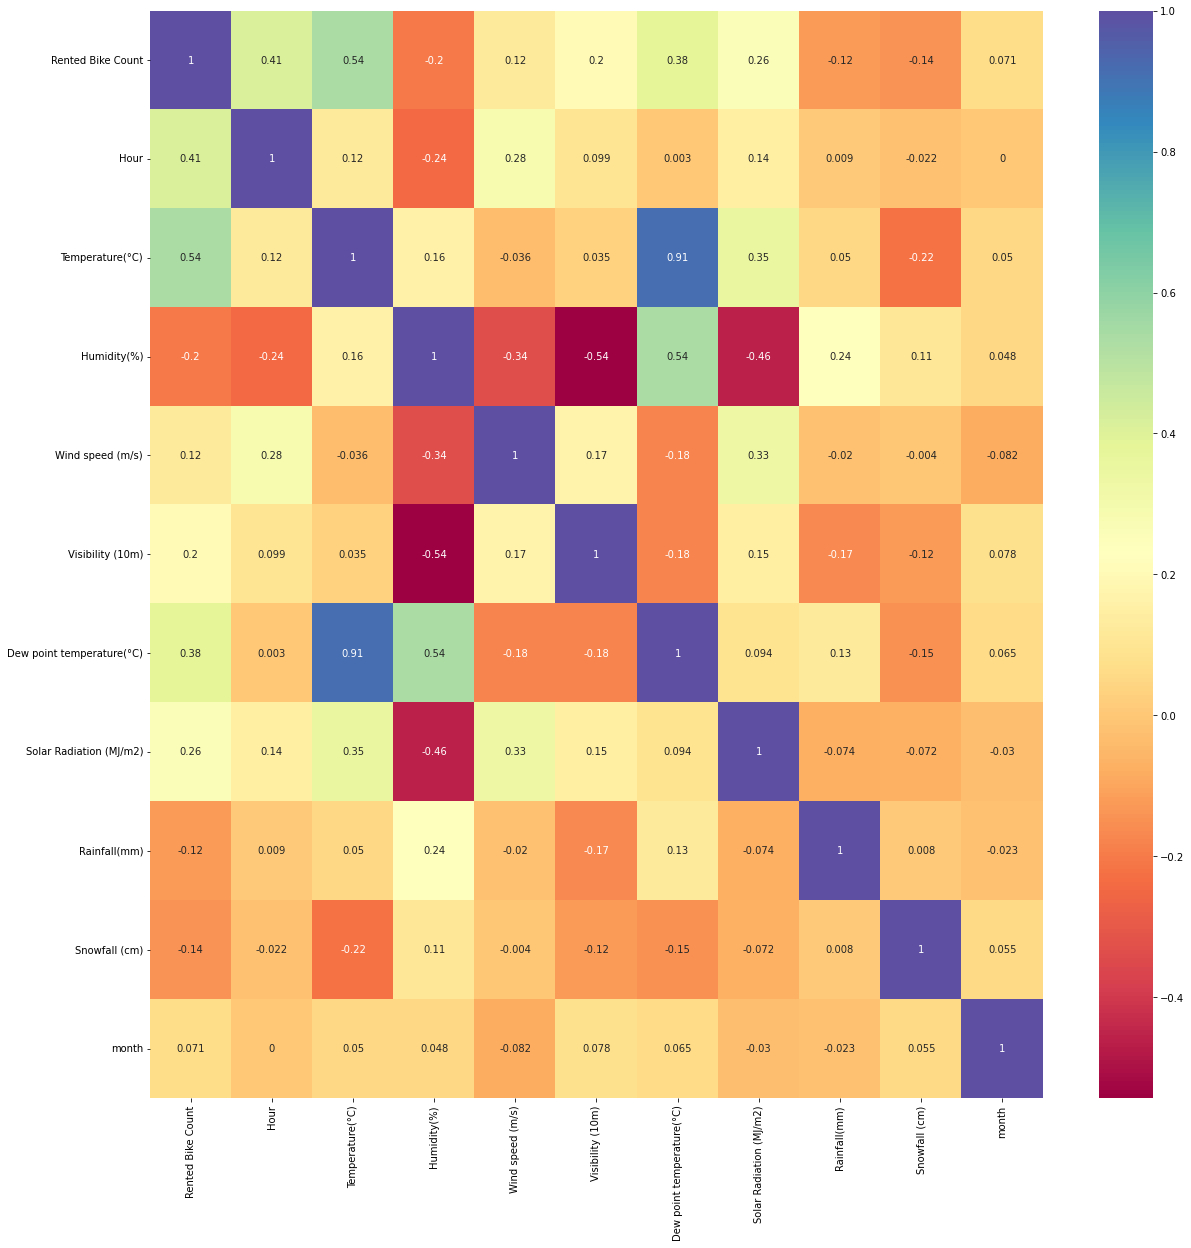

In [123]:
# Correlation Heatmap visualization code
corr = round(file.corr(),3)
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap="Spectral",annot=True)

##### 1. Why did you pick the specific chart?

**Answer:** correlation plot shows the relationship of the feature with respect to each other.

##### 2. What is/are the insight(s) found from the chart?

**Answer:** Following are the observation from the correlation matrix heatmap.
<br> (1) The maximum correlation value is 0.91 between temperature and dew point temperature feature.
<br> (2) month feature least impact the demand as it has the least correlation value with the demand.
<br> (3) Rainfall and snowfall impacts negatively to the demand.
<br> (4) Temperature has the maximum correlation value with demand and second highest is hour feature. 

#### Chart - 15 - Pair Plot 

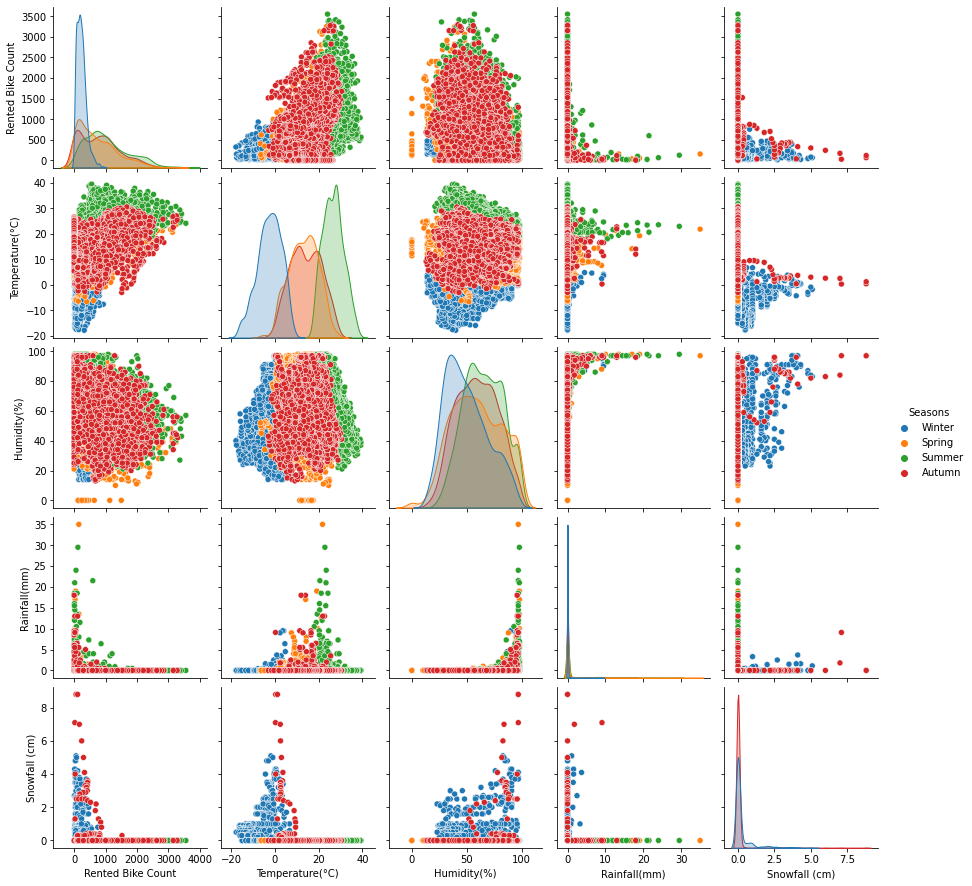

In [124]:
# Pair Plot visualization code
#Lets simply plot pair plot of just numerical data of distinct type like temperature and dew point temperature are similar so we keep one of them
data = file[['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)','Rainfall(mm)', 'Snowfall (cm)','Seasons']]
sns.pairplot(data,hue = 'Seasons')

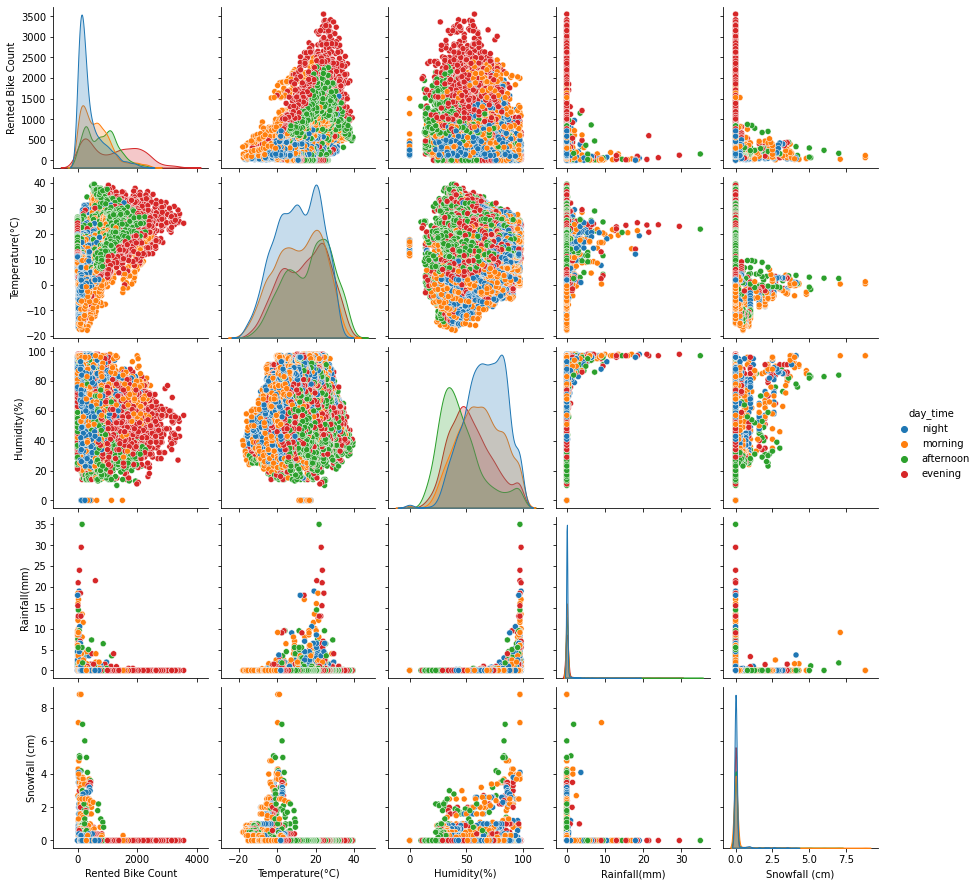

In [125]:
data = file[['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)','Rainfall(mm)', 'Snowfall (cm)','day_time']]
sns.pairplot(data,hue = 'day_time')

##### 1. Why did you pick the specific chart?

**Answer:** Pairplot can be used to show multiple feature plots at the same place so it is easy to visualise all feature at one place. Both the plot are similar except the hue feature.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**
<br>(1)demands are high when rainfall and snowfall both zero.
<br>(2)most of snowfall takes place in winter season however some snowfall happened in Automn season also.
<br>(3) In summer also there was rainfall of high depth was also observed, which have negative impact on the business.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis :** mean Rented Bike Count on holidays are same as the mean Rented Bike Count on not holiday.
<br>**Alternate hypothesis:** mean Rented Bike Count on holidays are not same as the mean Rented Bike Count on not holiday.

#### 2. Perform an appropriate statistical test.

In [126]:
# Perform Statistical Test to obtain P-Value
# performing t-test
from statsmodels.stats.weightstats import ztest
no_holiday = file['Rented Bike Count'][file['Holiday'] != 'Holiday']
holiday = file['Rented Bike Count'][file['Holiday'] == 'Holiday']
# since we are testing less than so we have one point ttest
import scipy.stats as stats
import math
ztest ,p_value = ztest(holiday, no_holiday, value=0,alternative='two-sided')
print(float(p_value))
print("p_value :",p_value)
if p_value < 0.05:
  print("Reject the null hypothesis")
else:
  print("Accept the null hypothesis")

1.1414541178447548e-11
p_value : 1.1414541178447548e-11
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

**Answer:**<br> In null hypothesis we are testing hypothesis that mean demand on holidays are same as on not holidays. so, it involves like equality symbols. so it will come under the two tailed test.
<br> performed two tailed ztest to proove the hypothesis.


##### Why did you choose the specific statistical test?

**Answer :** in case of mean value comparision we usually go for t-test or z-test, In this case our sample size is larger than 30 so we went for z-test.
<br> The p-value is less than the significance value so we reject the null hypothesis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: Rental Bike count is same in all seasons.
<br>Alternate hypothesis : Rental Bike count is not same in all seasons.

#### 2. Perform an appropriate statistical test.

In [127]:
# Perform Statistical Test to obtain P-Value
summ_demand = file['Rented Bike Count'][file['Seasons'] != 'Summer']
win_demand = file['Rented Bike Count'][file['Seasons'] != 'Winter']
spr_demand = file['Rented Bike Count'][file['Seasons'] != 'Spring']
Aut_demand = file['Rented Bike Count'][file['Seasons'] != 'Autumn']

# Anova test since we comparing a feature having four categories
F, p_value = stats.f_oneway(summ_demand, win_demand,spr_demand,Aut_demand)
print("p_value :",p_value)
if p_value < 0.05:
  print("Reject the null hypothesis")
else:
  print("Accept the null hypothesis")

p_value : 4.4536270162400715e-133
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

**Answer:** Anova test

##### Why did you choose the specific statistical test?

**Answer:** Since we comparing values of four data group i.e., categorical feature has four category.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Lets perform normality test on the target variable by using the graphical (quantile - quantile plot) and statistically using normal Test.

<br> **Null hypothesis:** Rented bike count follows normal distribution
<br> **Alternate hypothesis:** Rented bike count does not follow the normal distribution.

#### 2. Perform an appropriate statistical test.

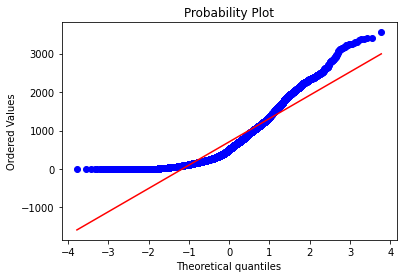

In [128]:
## Graphical method using quantile quantile plot
data = file['Rented Bike Count']
stats.probplot(data, plot=plt)
plt.show()

**observation :** the curve is not linear, so the rented bike demand seems to not have gaussian distribution.

In [129]:
# Perform Statistical Test to obtain P-Value
stat,p_value = stats.normaltest(data)
print("p_value :",p_value)
if p_value < 0.05:
  print("Reject the null hypothesis")
else:
  print("Accept the null hypothesis")

p_value : 3.779491395679156e-308
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

**Answer Here:** performed normality test to calculate p-value.

##### Why did you choose the specific statistical test?

**Answer Here:** 

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [130]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [131]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [132]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [133]:
# Expand Contraction

#### 2. Lower Casing

In [134]:
# Lower Casing

#### 3. Removing Punctuations

In [135]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [136]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [137]:
# Remove Stopwords

In [138]:
# Remove White spaces

#### 6. Rephrase Text

In [139]:
# Rephrase Text

#### 7. Tokenization

In [140]:
# Tokenization

#### 8. Text Normalization

In [141]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [142]:
# POS Taging

#### 10. Text Vectorization

In [143]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [144]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [145]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [146]:
# Transform Your data

### 6. Data Scaling

In [147]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [148]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [149]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [150]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [151]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [152]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [153]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [154]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [155]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [156]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [157]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [158]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [159]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [160]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***